In [ ]:
# reminder that if you are installing libraries in a Google Colab instance you will be prompted to restart your kernal

try:
    import geemap, ee
except ModuleNotFoundError:
    if 'google.colab' in str(get_ipython()):
        print("package not found, installing w/ pip in Google Colab...")
        !pip install geemap
    else:
        print("package not found, installing w/ conda...")
        !conda install mamba -c conda-forge -y
        !mamba install geemap -c conda-forge -y
    import geemap, ee

In [ ]:
try:
        ee.Initialize()
except Exception as e:
        ee.Authenticate()
        ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=i4pRR7CiTWtre54sAeUJOPkrDGP3Ks06ogKXLuB86Zw&tc=kMQUq9JYHyocvgZU9-cRQEtejtHukZENATGQooGGpko&cc=KpKdJdlrR_1FrD11r_L3k7Y2BoaTiGL-xYG3HmeBztE

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AdQt8qit1DsAohRaCWHUdyHaahQYW4X6Q2ZyqKST8wq3tv4KGrfK3UDJa-c

Successfully saved authorization token.


# Identifikasi Wilayah dengan Hotspot Tinggi
-  Data FIRMS (https://developers.google.com/earth-engine/datasets/catalog/FIRMS)
- Data MODIS (https://developers.google.com/earth-engine/datasets/catalog/MODIS_061_MOD14A1)

# Identifikasi Image
- https://ieee-dataport.org/open-access/flame-dataset-aerial-imagery-pile-burn-detection-using-drones-uavs

# Identifikasi Arah dan Area Penyebaran Kebakaran
- Data GFS (https://developers.google.com/earth-engine/datasets/catalog/NOAA_GFS0P25)

In [ ]:
# https://developers.google.com/earth-engine/datasets/catalog/FIRMS

dataset1 = ee.ImageCollection('FIRMS').filter(
    ee.Filter.date('2019-01-01', '2019-12-31')).select('T21');

dataset2 = ee.ImageCollection('FIRMS').filter(
    ee.Filter.date('2022-01-01', '2022-08-20')).select('T21');

firesVis = {
  "min": 325.0,
  "max": 400.0,
  "palette": ['red', 'orange', 'yellow']
}

center_lat = 0.1460389
center_lon = 110.611896
zoomlevel=10

fires1_tile = geemap.ee_tile_layer(dataset1, firesVis, 'Fire 2019', opacity=0.75)
fires2_tile = geemap.ee_tile_layer(dataset2, firesVis, 'Fire 2020', opacity=0.75)

# initialize our map
map1 = geemap.Map(center=[center_lat,center_lon], zoom=zoomlevel)
# map1.addLayer(fires, firesVis, 'Fires')
map1.split_map(left_layer=fires1_tile, right_layer=fires2_tile)
map1.addLayerControl()
map1

Map(center=[0.1460389, 110.611896], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

In [ ]:
# https://developers.google.com/earth-engine/datasets/catalog/MODIS_061_MOD14A1

dataset1 = ee.ImageCollection('MODIS/061/MOD14A1').filter(ee.Filter.date('2019-01-01', '2019-12-31')).median()
dataset2 = ee.ImageCollection('MODIS/061/MOD14A1').filter(ee.Filter.date('2020-01-01', '2020-12-31')).median()

fire1 = ee.ImageCollection('FIRMS').filter(
    ee.Filter.date('2019-01-01', '2019-12-31')).select('T21');

firesVis = {
  "min": 325.0,
  "max": 400.0,
  "palette": ['red', 'orange', 'yellow']
}

fireMaskVis = {
  "min": 0.0,
  "max": 6000.0,
  "bands": ['MaxFRP', 'FireMask', 'FireMask']
}

center_lat = 0.1460389
center_lon = 110.611896
zoomlevel=10

fires1_tile = geemap.ee_tile_layer(dataset1, fireMaskVis, 'Fire 2019')
fires2_tile = geemap.ee_tile_layer(dataset2, fireMaskVis, 'Fire 2020')

# initialize our map
map1 = geemap.Map(center=[center_lat,center_lon], zoom=zoomlevel)
map1.split_map(left_layer=fires1_tile, right_layer=fires2_tile)
map1.addLayerControl()
map1

Map(center=[0.1460389, 110.611896], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

In [ ]:
# https://developers.google.com/earth-engine/datasets/catalog/FIRMS

dataset1 = ee.ImageCollection('FIRMS').filter(
    ee.Filter.date('2019-01-01', '2019-12-31')).select('T21');

dataset2 = ee.ImageCollection('FIRMS').filter(
    ee.Filter.date('2022-01-01', '2022-08-20')).select('T21');

level2  = ee.FeatureCollection("FAO/GAUL/2015/level1").filter(ee.Filter.eq('ADM0_NAME','Indonesia'));

firesVis = {
  "min": 325.0,
  "max": 400.0,
  "palette": ['red', 'orange', 'yellow']
}

center_lat = 0.1460389
center_lon = 110.611896
zoomlevel=10

fires1_tile = geemap.ee_tile_layer(dataset1, firesVis, 'Fire 2019', opacity=0.75)
fires2_tile = geemap.ee_tile_layer(dataset2, firesVis, 'Fire 2020', opacity=0.75)

# initialize our map
map1 = geemap.Map(center=[center_lat,center_lon], zoom=zoomlevel)
map1.addLayer(dataset2.median().clip(level2.geometry()), firesVis, 'FIRMS 2022')
map1.addLayer(level2, {}, 'First Level Administrative Units', opacity=0.5)
# map1.split_map(left_layer=fires1_tile, right_layer=fires2_tile)
map1.addLayerControl()
map1

Map(center=[0.1460389, 110.611896], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBo…

## Wind

In [ ]:
# https://developers.google.com/earth-engine/datasets/catalog/NOAA_GFS0P25

GFS0P25 = ee.ImageCollection('NOAA/GFS0P25')
level2  = ee.FeatureCollection("FAO/GAUL/2015/level2").filter(ee.Filter.eq('ADM1_NAME','Kalimantan Barat'));

visTave = {
  "min": 20, 
  "max": 35, 
  "palette": ['ffffcc','ffeda0','fed976','feb24c','fd8d3c','fc4e2a','e31a1c','bd0026','800026']
};

visWind = {
  "min": 0,
  "max": 10,
  "palette": ['3288bd', '66c2a5', 'abdda4', 'e6f598', 
  'fee08b', 'fdae61', 'f46d43', 'd53e4f']
};

visRH = {
  "min": 50,
  "max": 100,
  "palette": ['a50026', 'd73027', 'f46d43', 'fdae61', 'fee090', 
  'e0f3f8', 'abd9e9', '74add1', '4575b4', '313695'],
};

visPcp = {
  'min': 0, 
  'max': 50, 
  'palette': [
    'cccccc','f9f3d5','dce2a8','a8c58d','77a87d','ace8f8',
    '4cafd9','1d5ede','001bc0','9131f1','e983f3','f6c7ec'
  ]};

styleParams = {
  "color": '00909F',
  "width": 1.0
};

# today = ee.Date(Date().toISOString().split('T')[0]);
today = ee.Date('2022-08-23')

# rectangle = ee.Geometry.Rectangle(92, -12, 145, 9); # Indonesia
# bbox = ee.Feature(rectangle).geometry(); 

# rectangle = ee.Geometry.Rectangle(109.876820, -0.368039, 111.101622, 0.630053); # Indonesia
# bbox = ee.Feature(rectangle).geometry(); 

tave_d1_draft = (GFS0P25 
  .select('temperature_2m_above_ground')
  .filterDate(today, today.advance(6,'hour'))
  .filter(ee.Filter.lt('forecast_time',today.advance(1,'day').millis()))
  .filter(ee.Filter.inList('forecast_hours', [6,12,18,24]))
  .mean())

tave_d1 = tave_d1_draft.clip(level2.geometry());

uv_d1_draft = GFS0P25. \
  select(['u_component_of_wind_10m_above_ground', 'v_component_of_wind_10m_above_ground']). \
  filterDate(today, today.advance(6,'hour')). \
  filter(ee.Filter.lt('forecast_time',today.advance(1,'day').millis())). \
  filter(ee.Filter.inList('forecast_hours', [6,12,18,24])). \
  mean()

rh_d1_draft = (GFS0P25 
  .select('relative_humidity_2m_above_ground')
  .filterDate(today, today.advance(6,'hour'))
  .filter(ee.Filter.lt('forecast_time',today.advance(1,'day').millis()))
  .filter(ee.Filter.inList('forecast_hours', [6,12,18,24]))
  .mean())

rh_d1 = rh_d1_draft.clip(level2.geometry());

pcp_d1_draft = (GFS0P25 
  .select('total_precipitation_surface')
  .filterDate(today, today.advance(6,'hour'))
  .filter(ee.Filter.lt('forecast_time',today.advance(1,'day').millis()))
  .filter(ee.Filter.inList('forecast_hours', [6,12,18,24]))
  .sum())
  
pcp_d1 = pcp_d1_draft.updateMask(pcp_d1_draft.gt(1)).clip(level2.geometry());
  
  # # // Wind speed and direction
  # # //---
  # # // Based on code from Gennadii Donchyts
  # # // https://code.earthengine.google.com/320ee5bc81f2de3ae49f348f8ec9a6d7
uv_d1_0 = uv_d1_draft.clip(level2.geometry());

p = geemap.Map()
scale = p.getScale() * 10;
numPixels = 1e10;

samples = uv_d1_0.rename(['u10', 'v10']).sample(**{
  "region": level2.geometry(), 
  "scale": 25000, 
  "numPixels": numPixels,
  "geometries": True
});

scaleVector = 0.1;

def fun(f):
  u = ee.Number(f.get('u10')).multiply(scaleVector)
  v = ee.Number(f.get('v10')).multiply(scaleVector)
  
  origin = f.geometry();

  # // translate
  proj = origin.projection().translate(u, v)
  end = ee.Geometry.Point(origin.transform(proj).coordinates())

  # // construct line
  geom = ee.Algorithms.GeometryConstructors.LineString([origin, end], None, True)
  
  return f.setGeometry(geom)

vectors_d1 = samples.map(lambda f: fun(f))

uv_d1 = uv_d1_0.pow(2).reduce(ee.Reducer.sum()).sqrt();

dataset2 = ee.ImageCollection('FIRMS').filter(
    ee.Filter.date('2022-01-01', '2022-08-20')).select('T21');

firesVis = {
  "min": 325.0,
  "max": 400.0,
  "palette": ['red', 'orange', 'yellow']
}

center_lat = 0.1460389
center_lon = 110.611896
zoomlevel=8

# gridmet_tile = geemap.ee_tile_layer(maximumTemperature, maximumTemperatureVis, 'GRIDMET August 2022')

map1 = geemap.Map(center=[center_lat,center_lon], zoom=zoomlevel)
map1.centerObject(level2, zoom=zoomlevel)
map1.addLayer(level2, {}, 'Second Level Administrative Units')
# map1.addLayer(tave_d1, visTave, 'Temperature August 2022')
map1.addLayer(uv_d1, visWind, 'Windspeed August 2022')
map1.addLayer(vectors_d1.style(**{ "color": 'white', "width": 1 }), {}, 'Wind Direction August 2022')
# map1.addLayer(rh_d1, visRH, 'Relative Humidity 2022')
# map1.addLayer(pcp_d1, visPcp, 'Total Precipitation 2022')
map1.addLayer(dataset2.median().clip(level2.geometry()), firesVis, 'FIRMS August 2022')

# map1.add_colorbar(
#     visTave, label="Temperature (°C)", layer_name="Temperature Legend", orientation="vertical"
# )
map1.add_colorbar(
    visWind, label="Wind Speed (m/s)", layer_name="Windspeed Legend", orientation="vertical"
)
# map1.add_colorbar(
#     visPcp, label="Total Precipitation (mm)", layer_name="Total Precipitation Legend", orientation="vertical"
# )
# map1.add_time_slider(dataset2, firesVis)
map1.addLayerControl()
map1

Map(center=[-0.08939312490511708, 111.11798765080803], controls=(WidgetControl(options=['position', 'transpare…

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# aoi = ee.Geometry.Polygon(
#     [[[-110.8, 44.7], [-110.8, 44.6], [-110.6, 44.6], [-110.6, 44.7]]], None, False
# )

rgb_img = geemap.ee_to_numpy(uv_d1, region=level2)
print(rgb_img.shape)

rgb_img_test = (255 * ((rgb_img[:, :, 0:3] - 100) / 3500)).astype('uint8')
plt.imshow(rgb_img_test)
plt.show()

Image.sampleRectangle: Fully masked pixels / pixels outside of the image footprint when sampling band 'sum' with no default value set. Note that calling sampleRectangle() on an image after ee.Image.clip() may result in a sampling bounding box outside the geometry passed to clip().


AttributeError: ignored

In [ ]:
import os

firms = ee.ImageCollection('FIRMS').filter(
    ee.Filter.date('2022-01-01', '2022-08-20')).select('T21');

firesVis = {
  "min": 325.0,
  "max": 400.0,
  "palette": ['red', 'orange', 'yellow']
}

level2  = ee.FeatureCollection("FAO/GAUL/2015/level2").filter(ee.Filter.eq('ADM0_NAME','Indonesia'));
# level2_img = level2.reduceToImage(**{
#     "properties": ['ADM2_CODE'],
#     "reducer": ee.Reducer.first()
# }).select("first"). \
# rename("ADM2_CODE"). \
# setDefaultProjection(**{"crs": ee.Projection('EPSG:4326'), "scale":250}). \
# reduceResolution(**{"reducer":ee.Reducer.mode(), "maxPixels":2048})

# out_dir = os.path.expanduser('~/Downloads')
# out_firms_stats = os.path.join(out_dir, 'firms_stats.csv')
geemap.zonal_statistics(
    firms.toBands(), level2, statistics_type='MEAN', scale=1000
)

# df_firms = geemap.image_stats_by_zone(firms.first().clip(level2.geometry()), 
#                                       level2, 
#                                       reducer='MEAN')
# df_firms.head()

The statistics type must be one of the following: MEAN, MAXIMUM, MEDIAN, MINIMUM, MODE, STD, MIN_MAX, SUM, VARIANCE, HIST, FIXED_HIST


In [ ]:
df_hist = pd.read_csv('https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/tables/056d2b1f5bb1703f7928983cbb2f0537-58d9fb18b3a44878477627b1632296ef:getFeatures')
df_hist[df_hist['2022008_T21'].notnull()].head(10)

,2022001_T21,2022002_T21,2022003_T21,2022004_T21,2022005_T21,2022006_T21,2022007_T21,2022008_T21,2022009_T21,2022010_T21,...,ADM1_NAME,DISP_AREA,Shape_Leng,STATUS,STR2_YEAR,ADM0_NAME,ADM0_CODE,Shape_Area,ADM2_CODE,system:index
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{bucketMin=315.5, bucketWidth=5.68434188608080...",NaN,NaN,...,Jambi,NO,4.768163,Member State,2001,Indonesia,116,0.607111,73795,00010000000000000f7b
7,NaN,NaN,NaN,NaN,"{bucketMin=311.29998779296875, bucketWidth=5.6...",NaN,NaN,"{bucketMin=314.5, bucketWidth=5.68434188608080...",NaN,NaN,...,Jambi,NO,2.994085,Member State,2001,Indonesia,116,0.404614,73862,00010000000000000f7e
24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{bucketMin=309.29998779296875, bucketWidth=5.6...",NaN,NaN,...,Sulawesi Tengah,NO,10.860941,Member State,2001,Indonesia,116,1.063499,73801,00010000000000000f8f
32,NaN,NaN,NaN,NaN,"{bucketMin=307.8999938964844, bucketWidth=5.68...","{bucketMin=309.8999938964844, bucketWidth=5.68...",NaN,"{bucketMin=311.296875, bucketWidth=0.015625, h...",NaN,"{bucketMin=308.0625, bucketWidth=0.0625, histo...",...,Riau,NO,13.924530,Member State,2001,Indonesia,116,1.177699,73651,00010000000000000f97
34,NaN,NaN,NaN,NaN,NaN,"{bucketMin=319.20001220703125, bucketWidth=5.6...",NaN,"{bucketMin=319.79998779296875, bucketWidth=5.6...",NaN,NaN,...,Riau,NO,7.621730,Member State,2001,Indonesia,116,0.864481,73688,00010000000000000f99
36,NaN,NaN,NaN,NaN,NaN,"{bucketMin=304.5, bucketWidth=5.68434188608080...",NaN,"{bucketMin=310.5, bucketWidth=0.03125, histogr...",NaN,"{bucketMin=316.0, bucketWidth=0.125, histogram...",...,Riau,NO,7.785202,Member State,2001,Indonesia,116,1.027730,73825,00010000000000000f9b
37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{bucketMin=313.3999938964844, bucketWidth=5.68...",NaN,NaN,...,Riau,NO,6.794820,Member State,2001,Indonesia,116,0.721691,73835,00010000000000000f9c
38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{bucketMin=319.79998779296875, bucketWidth=5.6...",NaN,NaN,...,Riau,NO,5.637481,Member State,2001,Indonesia,116,0.650702,73836,00010000000000000f9d
39,NaN,NaN,NaN,NaN,"{bucketMin=312.5, bucketWidth=5.68434188608080...",NaN,NaN,"{bucketMin=309.1875, bucketWidth=0.03125, hist...",NaN,"{bucketMin=313.69921875, bucketWidth=0.0039062...",...,Riau,NO,5.455053,Member State,2001,Indonesia,116,0.633270,73849,00010000000000000f9e
78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{bucketMin=319.20001220703125, bucketWidth=5.6...",NaN,NaN,...,Sulawesi Tenggara,NO,0.869555,Member State,2002,Indonesia,116,0.023743,73710,00010000000000000fc5


In [ ]:
print(df_hist['2022008_T21'][24])
print(df_firms['2022008_T21'][24])

{bucketMin=309.29998779296875, bucketWidth=5.6843418860808015E-14, histogram=[6.0], bucketMeans=[309.29998779296875]}
309.29998779296875


In [ ]:
import pandas as pd

df_firms = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/forest-fire/zonal_stats.csv')
df_firms.head()

,2022001_T21,2022002_T21,2022003_T21,2022004_T21,2022005_T21,2022006_T21,2022007_T21,2022008_T21,2022009_T21,2022010_T21,...,ADM1_NAME,DISP_AREA,Shape_Leng,STATUS,STR2_YEAR,ADM0_NAME,ADM0_CODE,Shape_Area,ADM2_CODE,system:index
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Nangroe Aceh Darussalam,NO,1.876192,Member State,2001,Indonesia,116,0.140708,73657,00010000000000000f77
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Nangroe Aceh Darussalam,NO,4.582349,Member State,2001,Indonesia,116,0.151547,73850,00010000000000000f78
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Jambi,NO,4.439147,Member State,2001,Indonesia,116,0.469857,73647,00010000000000000f79
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Jambi,NO,3.145136,Member State,2001,Indonesia,116,0.389503,73663,00010000000000000f7a
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,315.5,NaN,NaN,...,Jambi,NO,4.768163,Member State,2001,Indonesia,116,0.607111,73795,00010000000000000f7b


(443, 245)


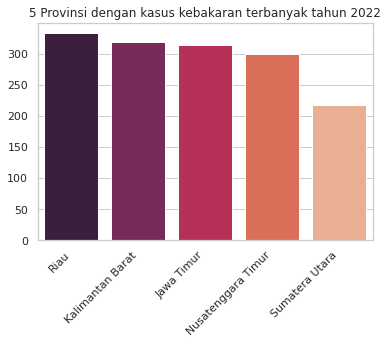

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt

filter_col = [col for col in df_firms if col.startswith('2022')]
print(df_firms.shape)
df_firms['num_days'] = df_firms[filter_col].notnull().sum(axis=1)
dtplot = df_firms.groupby('ADM1_NAME')['num_days'].sum().sort_values(ascending=False).head(5).reset_index()

ax = sns.barplot(x=dtplot.ADM1_NAME, y=dtplot.num_days, data=dtplot, palette=sns.color_palette("rocket", n_colors=len(dtplot)))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set(title='5 Provinsi dengan kasus kebakaran terbanyak tahun 2022')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [ ]:
cek = pd.wide_to_long(df_firms, stubnames = '2022', i=['system:index','ADM1_NAME'], j='hari', sep='_', suffix='\w+').sort_index().reset_index()
cek.head()

,system:index,ADM1_NAME,hari,2022131_T21,2022159_T21,2022072_T21,2022096_T21,2022089_T21,2022128_T21,2022207_T21,...,2022116_T21,2022025_T21,2022227_T21,2022038_T21,2022133_T21,2022130_T21,2022161_T21,2022009_T21,2022103_T21,2022


In [ ]:
df_firms.dtypes

2022001_T21     float64
2022002_T21     float64
2022003_T21     float64
2022004_T21     float64
2022005_T21     float64
                 ...   
ADM0_NAME        object
ADM0_CODE         int64
Shape_Area      float64
ADM2_CODE         int64
system:index     object
Length: 244, dtype: object